
# Project: Investigate a Dataset - [TMDb movie data]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset to be analyzed is TMDb movie data containing data for 10000 movies with different columns like popularity, budget, revenues, votes etc.. , it also has certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. And a final 2 columns for thhe budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>The proposed Questions are: <br>
<br>
**What is the effect of the movie genre on popularity, rating and revenue to net_revenue ?**  
<br>
<br>
                             **What is the Temporal Change in net Revenue and prefered genre ?** <br>
<br>and many other Questions can be proposed to get the optimum choice fo cast, director, genre and topic

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties


**importing dataset and viewing samples**

In [3]:
#importing dataset and viewing samples
df= pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**getting info to know if there's a potential for null values or duplicates**

In [4]:
#getting info to know if there's a potential for null values or duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**checking for duplicates** 


In [5]:
#checking for duplicates 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
 

**duplicates count "whole row"**


In [6]:
#duplicates count "whole row"
sum(df.duplicated())

1

**removing duplicated row and checking the sum**


In [7]:
#removing duplicated row
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

**droping columns with too much missing values and checking Data**


In [8]:
#droping columns with too much missing values
df.drop(["homepage","tagline","keywords"],axis=1, inplace=True)


In [9]:
#rechecking Data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**checking if there's a duplicated movies and droping them**


In [10]:
#checking if there's a duplicated movies and droping them
df["title+year"]=df.original_title + str(df.release_year)
print(df.duplicated("imdb_id").sum())
print(df.duplicated("title+year").sum())
df.drop_duplicates(subset="title+year",inplace=True)
df.drop_duplicates(subset="imdb_id",inplace=True)
df.info()

9
294
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10562 entries, 0 to 10865
Data columns (total 19 columns):
id                      10562 non-null int64
imdb_id                 10561 non-null object
popularity              10562 non-null float64
budget                  10562 non-null int64
revenue                 10562 non-null int64
original_title          10562 non-null object
cast                    10488 non-null object
director                10522 non-null object
overview                10558 non-null object
runtime                 10562 non-null int64
genres                  10541 non-null object
production_companies    9548 non-null object
release_date            10562 non-null object
vote_count              10562 non-null int64
vote_average            10562 non-null float64
release_year            10562 non-null int64
budget_adj              10562 non-null float64
revenue_adj             10562 non-null float64
title+year              10562 non-null object
dtypes: float6

**Calculating Indicies between Reveneue and Budget like "Ratio and net Revenue"**


In [11]:
#revenue/budget ratio for financial assessment
df["revenue/budget_ratio"]=df.revenue_adj/df.budget_adj
#since some values of budget are equal to 0 we may try another value like the difference
df["net_revenue"]=df.revenue_adj-df.budget_adj

**droping the ratio column as it has a lot of null values and dropping the remaining null values**


In [12]:
#droping the ratio column and the remaining null values
df.drop(["revenue/budget_ratio", "production_companies"],axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 0 to 10865
Data columns (total 19 columns):
id                10432 non-null int64
imdb_id           10432 non-null object
popularity        10432 non-null float64
budget            10432 non-null int64
revenue           10432 non-null int64
original_title    10432 non-null object
cast              10432 non-null object
director          10432 non-null object
overview          10432 non-null object
runtime           10432 non-null int64
genres            10432 non-null object
release_date      10432 non-null object
vote_count        10432 non-null int64
vote_average      10432 non-null float64
release_year      10432 non-null int64
budget_adj        10432 non-null float64
revenue_adj       10432 non-null float64
title+year        10432 non-null object
net_revenue       10432 non-null float64
dtypes: float64(5), int64(6), object(8)
memory usage: 1.6+ MB


In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_revenue
count,10432.000000,10432.000000,1.043200e+04,1.043200e+04,10432.000000,10432.000000,10432.000000,10432.000000,1.043200e+04,1.043200e+04,1.043200e+04
mean,66162.494153,0.654481,1.496067e+07,4.061625e+07,102.257381,221.481691,5.958158,2001.575345,1.784899e+07,5.184910e+07,3.400011e+07
std,92179.304967,1.012533,3.130204e+07,1.181751e+08,29.370058,583.212221,0.933168,12.602660,3.462584e+07,1.453224e+08,1.257017e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10589.750000,0.210278,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20669.000000,0.387684,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75735.250000,0.722425,1.600000e+07,2.503790e+07,111.000000,151.000000,6.600000,2011.000000,2.117990e+07,3.455423e+07,1.369452e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


**getting a final prief look on distributions and relations**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa7ef0780>,
      dtype=object)

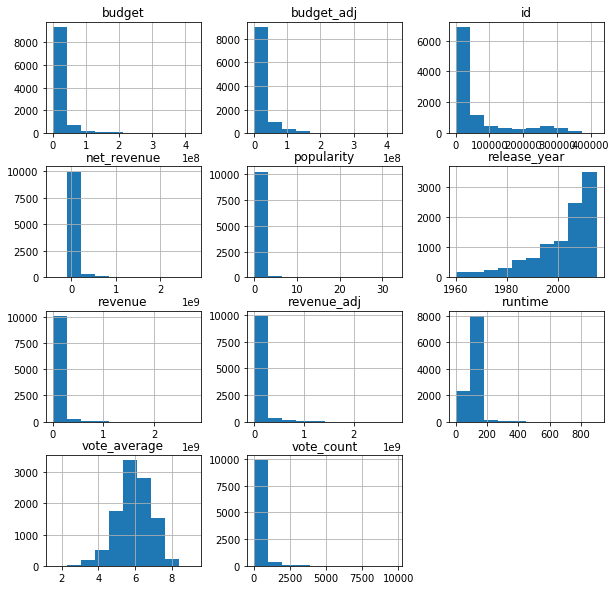

In [14]:
#getting a prief look on distributions and relations
df.hist(figsize=(10,10))

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: What is the effect of the movie genre on popularity, rating and revenue to net_revenue ?

**keeping a version of Dataframe without specific manipulation and coverting the complex strings into lists to be exploded in the next step**

In [15]:
df2=df #to keep a version of Dataframe without specific manipulation
# coverting the complex strings into lists that can be exploded
df["genres"]= df["genres"].str.split(pat="|")
df["cast"]= df["cast"].str.split(pat="|")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,title+year,net_revenue
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Jurassic World0 2015\n1 2015\n2 ...,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Mad Max: Fury Road0 2015\n1 2015...,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Insurgent0 2015\n1 2015\n2 ...,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Star Wars: The Force Awakens0 2015\n1 ...,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Furious 70 2015\n1 2015\n2 ...,1.210949e+09


In [16]:
#exploding values to get the data for each specific genre in the dataset
df=df.explode("genres")
df=df.explode("cast")



**genres distribution to get intuation of the highest produced genres**

We can see that the core genres are: Drama, Comedy, Thriller and Action.


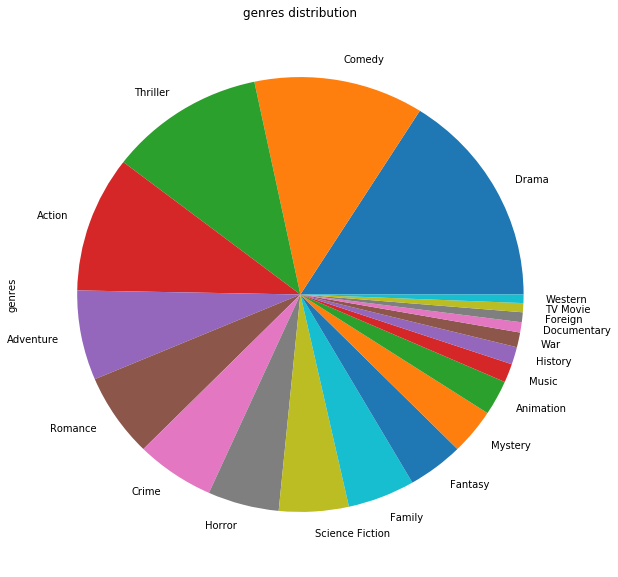

In [17]:
#genres distribution to get intuation of the highest genres
plt.title("genres distribution")
df["genres"].value_counts().plot(kind="pie",figsize= (10,10))
print("We can see that the core genres are: Drama, Comedy, Thriller and Action.")


**creating a list of available genres to get data and perform analysis for each one, defining plot function and finally making essential plots**

In [18]:
#creating a list of available genres to get data and perform analysis for each one
genres= list(dict(df["genres"].value_counts()).keys())
for genre in genres:
    globals()['%s' % genre] = df[df.genres==genre]

    
    

In [19]:
#defining a function to draw required plots for repetitive processes
def draw(y1,y2,y3,y4,y5,y6,y7):
    if (y4 == "max"):
        for x in y1:
             z= x
             y2[x]= globals()['%s' % x][y3].max()
    else:
        for x in y1:
            z= x
            y2[x]= globals()['%s' % x][y3].mean()

    plt.figure(figsize=(30,10))
    plt.rcParams.update({'font.size': 12}) 
    plt.xlabel(y5)
    plt.ylabel(y6)
    plt.title(y7)
    plt.bar(y2.keys(),y2.values())
    #y1 is the series which we will get indecies from
    #y2 is the dictionary we will add the data to
    #y3 is a string with the column name we will get the data from
    #y4 is a string should have value of "max" if the max is required else it will calculate the mean
    #y5 is X axis label
    #y6 is Y axis label
    #y7 is Chart Title



**genres vs max popularity plot**

The Target of this plot is to illustrate the effect of specific genres on the popularity of it to get an intuation on the audience preferences.
We can see that the most popular genres according to maximum value of popularity for the whole period are Action, Adventures, Science Fiction and Thriller the exact genre can be extracted in further steps.


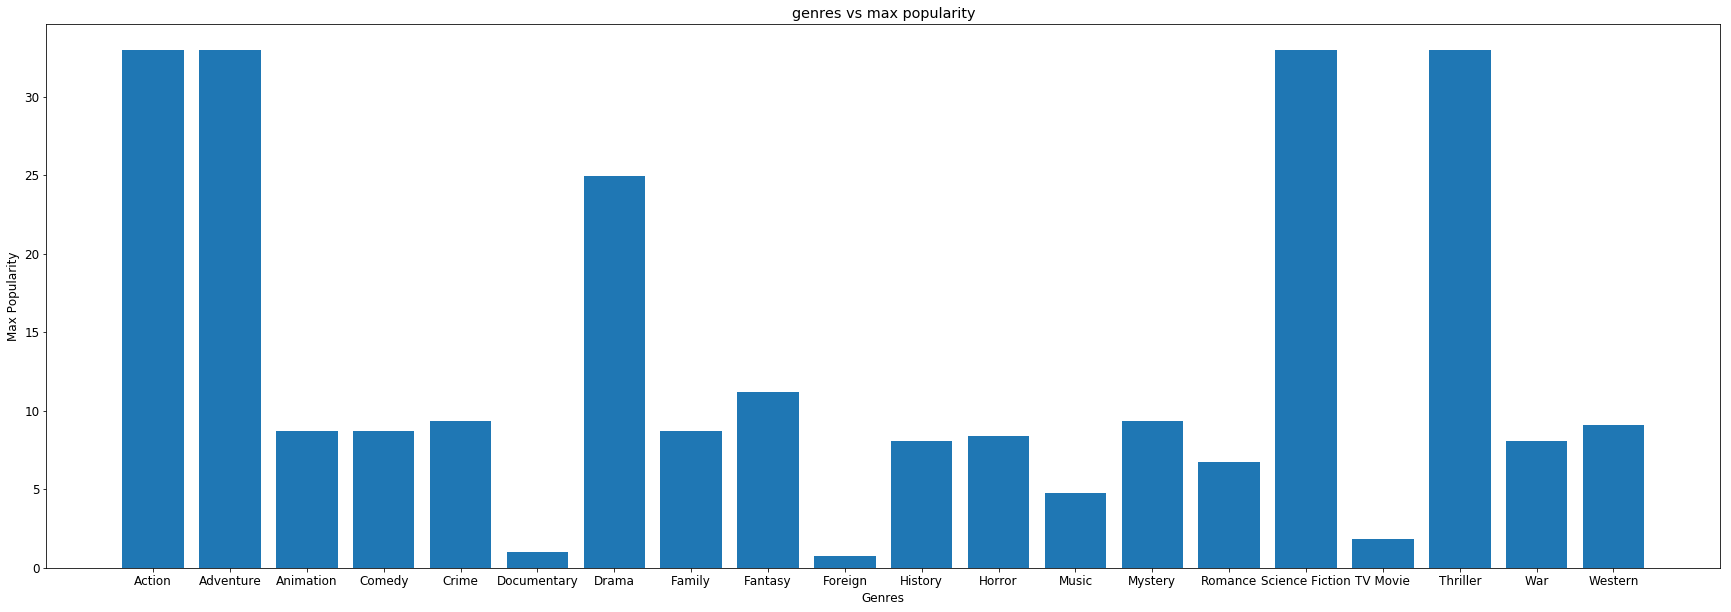

In [20]:
# genres vs max popularity to indicate the effect of chosing genre on the popularity
genres_vs_mpop={}
draw(genres,genres_vs_mpop,"popularity","max","Genres","Max Popularity","genres vs max popularity")
print("The Target of this plot is to illustrate the effect of specific genres on the popularity of it to get an intuation on the audience preferences.")
print("We can see that the most popular genres according to maximum value of popularity for the whole period are Action, Adventures, Science Fiction and Thriller the exact genre can be extracted in further steps.")

**genres vs mean popularity plot**

The Target of this plot is the same as previous but with less bias towards possible extreme events of a single year.
We can see that the most popular genres according to mean value of popularity for the whole period is still Adventures which is a good indication that it has the highest popularity of all genres.


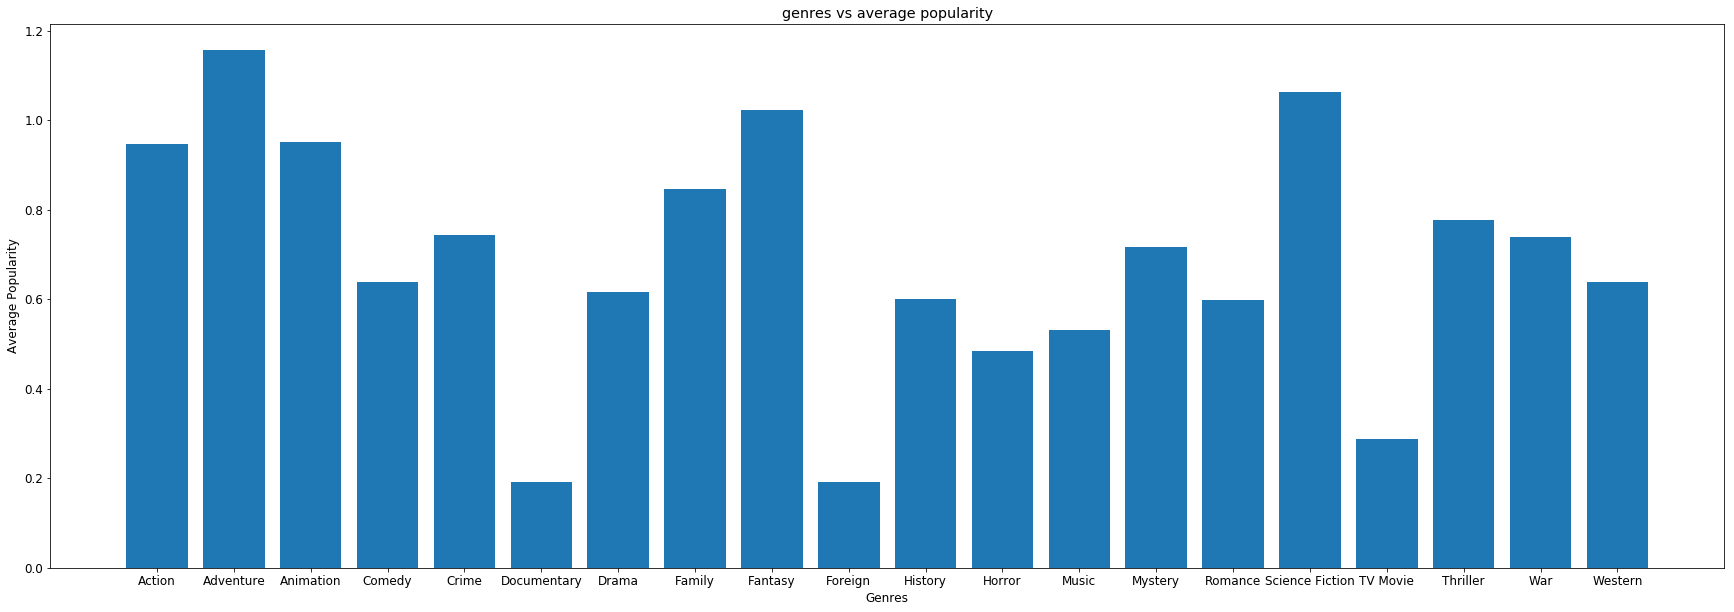

In [21]:
# genres vs average popularity to indicate the effect of chosing genre on the popularity with less bias
genres_vs_pop={}
draw(genres,genres_vs_pop,"popularity","mean","Genres","Average Popularity","genres vs average popularity")
print("The Target of this plot is the same as previous but with less bias towards possible extreme events of a single year.")
print("We can see that the most popular genres according to mean value of popularity for the whole period is still Adventures which is a good indication that it has the highest popularity of all genres.")

**genres vs max Rating plot**

The Target of this plot is to illustrate the effect of specific genres on the Rating of it to get an intuation on the most successful genres.
We can see that the most popular genres according to maximum value of Ratings for the whole period is Documentary.


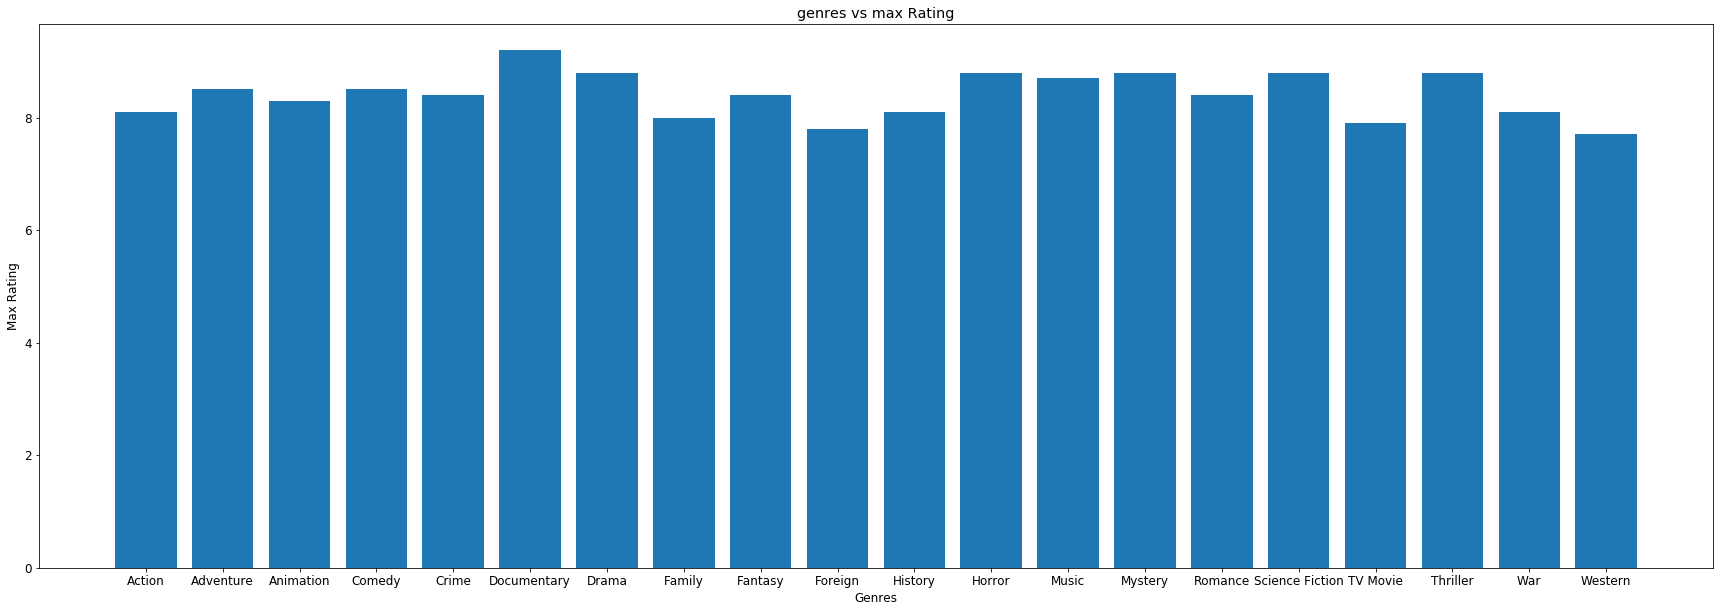

In [22]:
# genres vs max Rating indicate the effect of chosing genre on the Rating
genres_vs_mrating={}
draw(genres,genres_vs_mrating,"vote_average","max","Genres","Max Rating","genres vs max Rating")
print("The Target of this plot is to illustrate the effect of specific genres on the Rating of it to get an intuation on the most successful genres.")
print("We can see that the most popular genres according to maximum value of Ratings for the whole period is Documentary.")

**genres vs mean Rating plot**

The Target of this plot is the same as previous but with less bias towards possible extreme events of a single year.
We can see that the most popular genres according to mean value of Ratings for the whole period is still Documentary which is a good indication that the documentary genre movies has a good potential for having high rating if made properly.


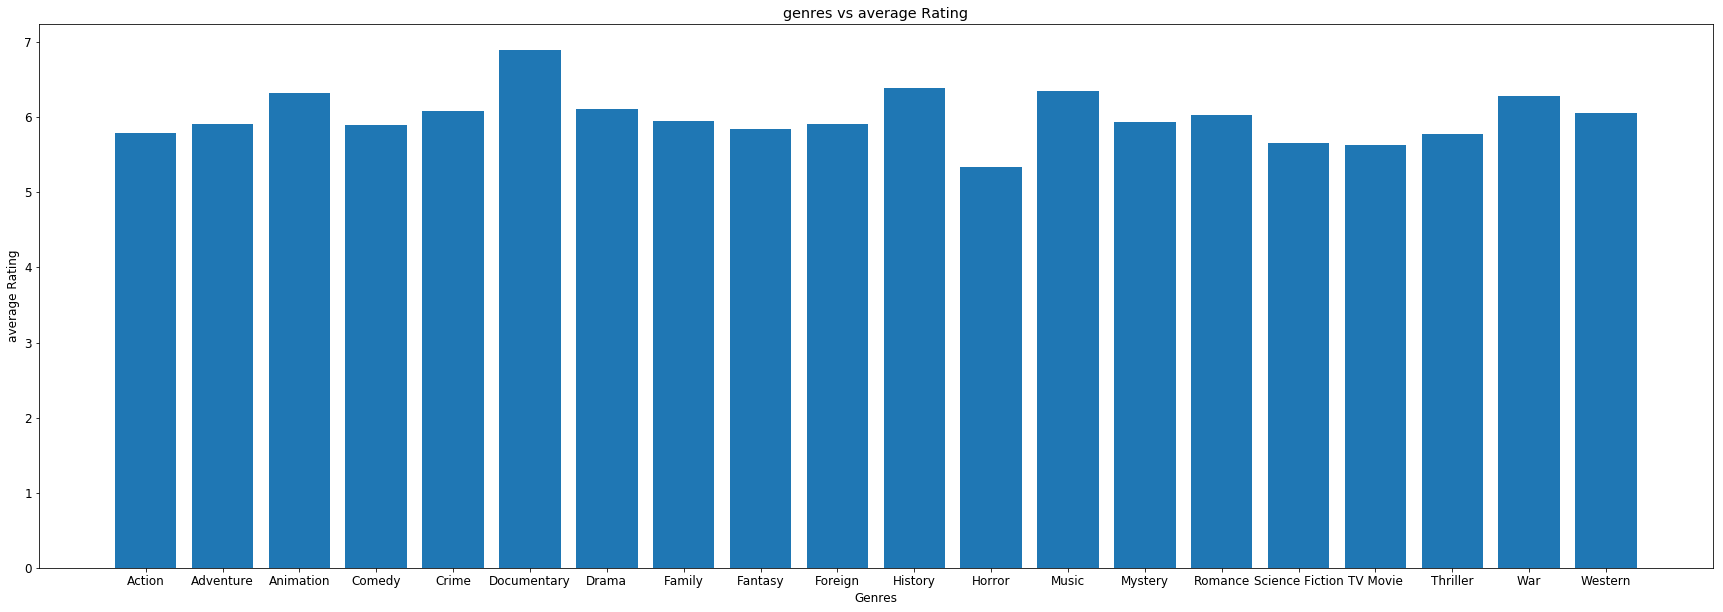

In [23]:
# genres vs average Rating indicate the effect of chosing genre on the Rating with less bias
genres_vs_rating={}
draw(genres,genres_vs_rating,"vote_average","mean","Genres","average Rating","genres vs average Rating")
print("The Target of this plot is the same as previous but with less bias towards possible extreme events of a single year.")
print("We can see that the most popular genres according to mean value of Ratings for the whole period is still Documentary which is a good indication that the documentary genre movies has a good potential for having high rating if made properly.")

**genres vs mean net Revenue plot**

The Target of this plot is to illustrate the effect of specific genres on the net revenue of it to get an intuation on the most successful genres in attracting audiences to cinemas or producing revenue.
We can see that the most popular genres according to mean value of net revenue for the whole period is Adventures followed by fantasy a thing to be noted is that those values maybe misleading if not used properly as it doesnt show how big is the budget and it should be combined with a ratio value but it's fine since like half of the budget data is equal to 0 and analysis can be modified later if full budget data is avaialable.


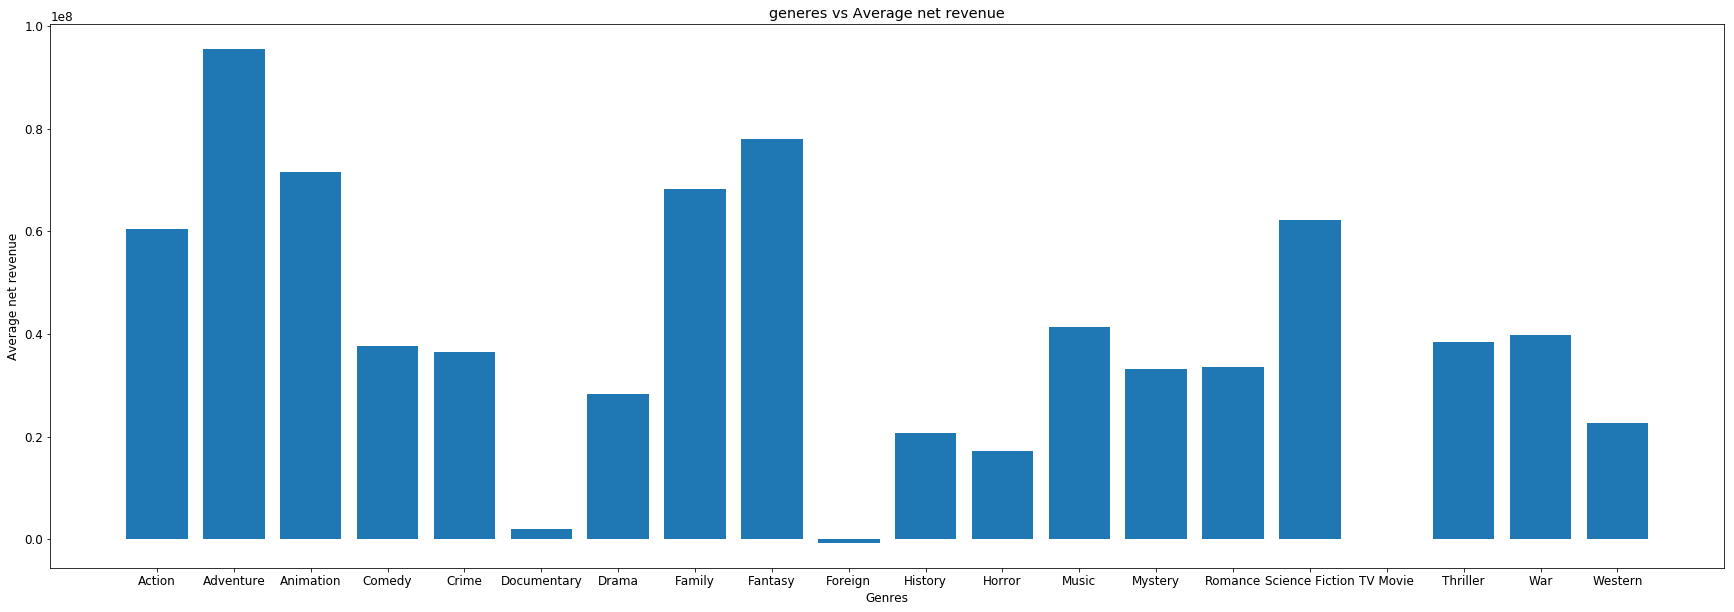

In [24]:
#generes vs Average net revenue indicate the effect of chosing genre on the revenue with lower bias than the max value
genres_vs_revenue={}
draw(genres,genres_vs_revenue,"net_revenue","mean","Genres","Average net revenue","generes vs Average net revenue")
print("The Target of this plot is to illustrate the effect of specific genres on the net revenue of it to get an intuation on the most successful genres in attracting audiences to cinemas or producing revenue.")
print("We can see that the most popular genres according to mean value of net revenue for the whole period is Adventures followed by fantasy a thing to be noted is that those values maybe misleading if not used properly as it doesnt show how big is the budget and it should be combined with a ratio value but it's fine since like half of the budget data is equal to 0 and analysis can be modified later if full budget data is avaialable.")

**final values using Average to conclude the final results**

In [25]:
#Getting final values using Average to conclude the final results
max_revenue= max(genres_vs_revenue.values())
for key, value in genres_vs_revenue.items():
         if max_revenue == value:
             max_revenue_genre= key
print(("The Highest Average Reveneue is {} corresponding for {} genre.").format(max_revenue,max_revenue_genre))
max_pop= max(genres_vs_pop.values())
for key, value in genres_vs_pop.items():
         if max_pop == value:
             max_pop_genre= key
print(("The Highest Average Popularity is {} corresponding for {} genre.").format(max_pop,max_pop_genre))
max_rating= max(genres_vs_rating.values())
for key, value in genres_vs_rating.items():
         if max_rating == value:
             max_rating_genre= key
print(("The Highest Average Rating is {} corresponding for {} genre. \n").format(max_rating,max_rating_genre))
print("The accurate values follows the same conclusions we could get visually from plots we can see a good potential for investment in Adventures genre and preferably with Documentary genres like a movie that documents adventurious events.")

The Highest Average Reveneue is 95521836.580473 corresponding for Adventure genre.
The Highest Average Popularity is 1.1565498926940638 corresponding for Adventure genre.
The Highest Average Rating is 6.895001723543606 corresponding for Documentary genre. 

The accurate values follows the same conclusions we could get visually from plots we can see a good potential for investment in Adventures genre and preferably with Documentary genres like a movie that documents adventurious events.


### Research Question 2: What is the Temporal Change in net Revenue and prefered genre ?

**distribution of movies counts vs years to show the pattern of change of industry general scale over time**

We can see a good increase in the number of produced movies with increasing rate which shows how fast the industry grows.


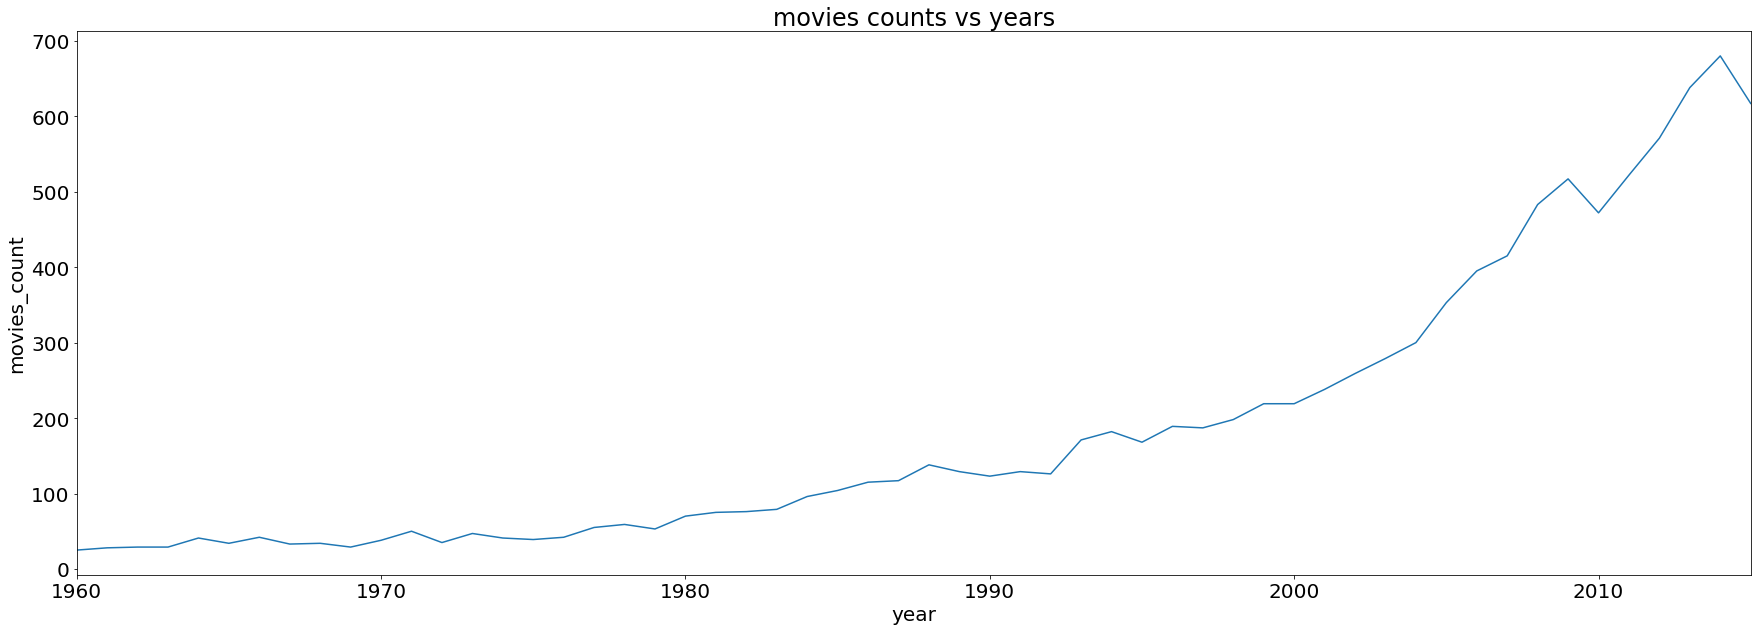

In [26]:
#showing distribution of movies counts vs years to show the pattern of change of industry general scale over time
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 20}) 
plt.xlabel("year")
plt.ylabel("movies_count")
plt.title("movies counts vs years")
df2["release_year"].value_counts().sort_index().plot()
print("We can see a good increase in the number of produced movies with increasing rate which shows how fast the industry grows.")

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 0 to 10865
Data columns (total 19 columns):
id                10432 non-null int64
imdb_id           10432 non-null object
popularity        10432 non-null float64
budget            10432 non-null int64
revenue           10432 non-null int64
original_title    10432 non-null object
cast              10432 non-null object
director          10432 non-null object
overview          10432 non-null object
runtime           10432 non-null int64
genres            10432 non-null object
release_date      10432 non-null object
vote_count        10432 non-null int64
vote_average      10432 non-null float64
release_year      10432 non-null int64
budget_adj        10432 non-null float64
revenue_adj       10432 non-null float64
title+year        10432 non-null object
net_revenue       10432 non-null float64
dtypes: float64(5), int64(6), object(8)
memory usage: 1.9+ MB


**total revenue vs year to show the pattern of change of industry financial scale over time**

In [28]:
release_years= list(dict(df2["release_year"].value_counts()).keys())
for year in release_years:
    globals()['year%s' % year] = df2[df2.release_year==year]


Now having the movies count and revenue on the same plot we can see that the industry scale is growing rapidly both from production and revenue aspects which shows a good potential for investment.


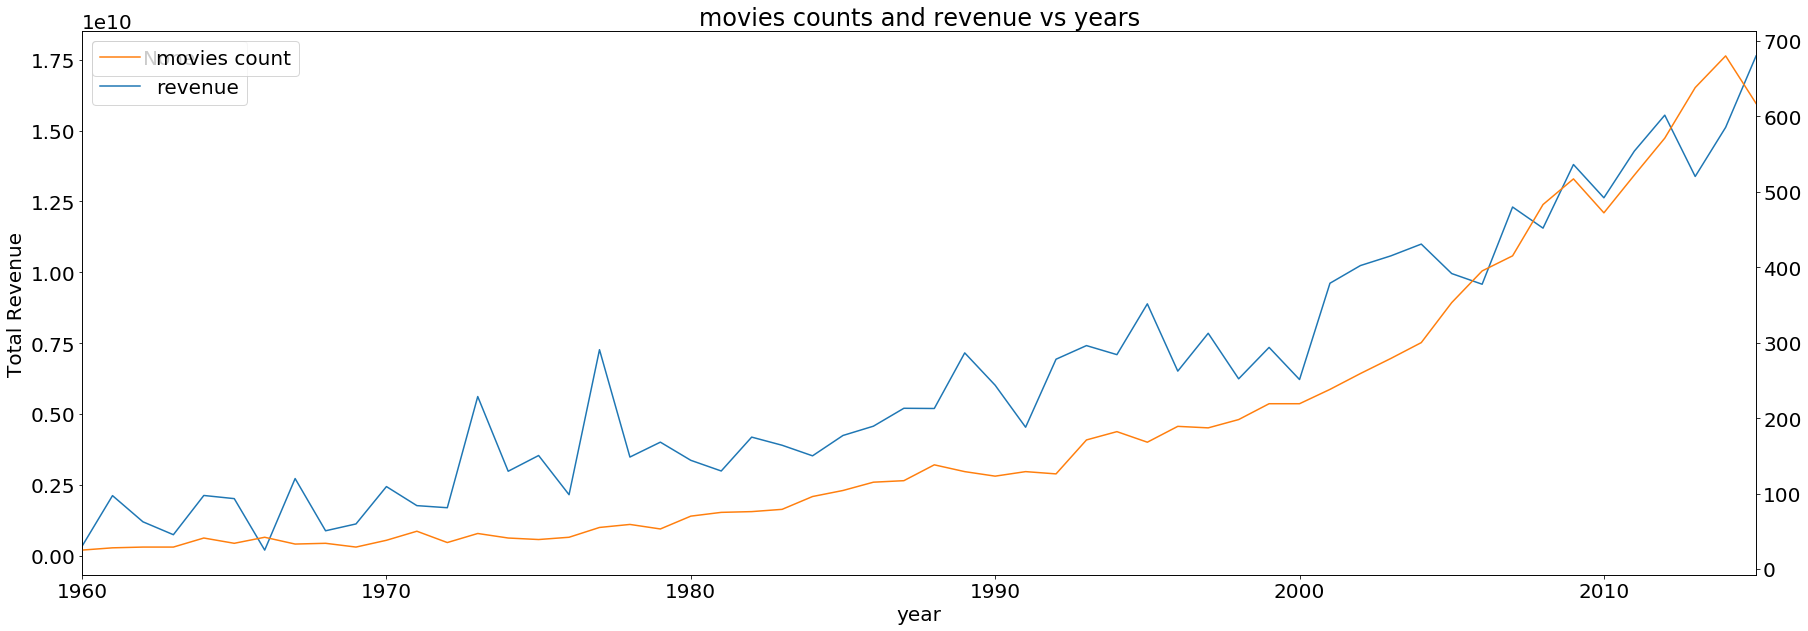

In [29]:
# total revenue vs year to show the pattern of change of industry financial scale over time
tot_revenue={}
for year in release_years:
    x= year
    tot_revenue[x]= globals()['year%s' % year]["net_revenue"].sum()
tot_revenue=dict( sorted(tot_revenue.items()))
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 20}) 
plt.xlabel("year")
plt.ylabel("Total Revenue")
plt.title("movies counts and revenue vs years")
plt.plot(tot_revenue.keys(),tot_revenue.values(),label="revenue")
plt.legend()
df2["release_year"].value_counts().sort_index().plot(secondary_y=True,label="movies count").legend()
print("Now having the movies count and revenue on the same plot we can see that the industry scale is growing rapidly both from production and revenue aspects which shows a good potential for investment.")

**most produced genre vs year table to show the change of peoples preferences over time**

In [30]:
# most produced genre vs year table to show the change of peoples preferences over time
genre_year={}
for year in release_years:
    globals()['year%s' % year] = df[df.release_year==year]
    x= year
    genre_year[x]= globals()['year%s' % year]["genres"].mode()
genre_year=dict(sorted(genre_year.items()))
genre_year_df = pd.DataFrame(genre_year)
genre_year_df.style


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Action,Drama,Drama,Drama,Drama,Thriller,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Action,Comedy,Drama,Comedy,Comedy,Comedy,Drama,Drama,Drama,Drama,Comedy,Drama,Drama,Drama,Drama,Drama,Comedy,Comedy,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama


In [31]:
print("We can see that the most produced genre is drama with small shifting from action and thriller to comedy movies.")

We can see that the most produced genre is drama with small shifting from action and thriller to comedy movies.


<a id='conclusions'></a>
## Conclusions

> **We can get some conclusions like adventures genre is the most popular and corresponds to the highest net revenues. However, the highest ratings are for Documentary genre
<br>
<br>
> from this point we can see that investing in Adventures genre is most beneficial
<br>
<br>
> We can see a huge contineous increase in produced movies along with net revenues which indicates that movies industry is great to invest in.
<br>
<br>
> The most produced genre is Drama. However this info could be misleading as genre data can have multiple values and generaly, most of the movies are considered to be dramatic and thus it doesn't always indicate the intended genre of the movie.
<br>
<br>
> There's a slight shift from Action and thriller to Comedy in the available years.**

### Limitations
> **Most of the missing data were objects and thus it couldn't be replaced.
<br>
<br>
> some budget values were equal to zero which is not logical and it prevented the calculation of any ratio
<br>
<br>
> keywords column had many missing values which prevented deciding which topics can attract audience**
<br>
<br>
> **The dataset can be coupled with historical events to show the effect of politics and socioeconomics on the growth of the indutry and the people preferences**

## Used Sources

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
<br>
<br>
https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
<br>
<br>
https://stackoverflow.com/questions/6181935/how-do-you-create-different-variable-names-while-in-a-loop
<br>
<br>
https://www.tutorialspoint.com/plot-a-bar-using-matplotlib-using-a-dictionary
<br>
<br>
https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
<br>
<br>
https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
<br>
<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
<br>
<br>
https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell#:~:text=5%20Answers&text=Just%20add%20where%20you,to%20make%20the%20new%20line.



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0